Load Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("CPI_Analysis.csv")

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (372, 30)

First few rows:
        Sector  Year     Month  Cereals and products  Meat and fish    Egg  \
0        Rural  2013   January                 107.5          106.3  108.1   
1        Urban  2013   January                 110.5          109.1  113.0   
2  Rural+Urban  2013   January                 108.4          107.3  110.0   
3        Rural  2013  February                 109.2          108.7  110.2   
4        Urban  2013  February                 112.9          112.9  116.9   

   Milk and products  Oils and fats  Fruits  Vegetables  ...  Housing  \
0              104.9          106.1   103.9       101.9  ...      NaN   
1              103.6          103.4   102.3       102.9  ...    100.3   
2              104.4          105.1   103.2       102.2  ...    100.3   
3              105.4          106.7   104.0       102.4  ...      NaN   
4              104.0          103.5   103.1       104.9  ...    100.4   

   Fuel and light  Household goods and services  H

In [25]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Sector', 'Year', 'Month', 'Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.', 'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light', 'Household goods and services', 'Health', 'Transport and communication', 'Recreation and amusement', 'Education', 'Personal care and effects', 'Miscellaneous', 'General index']


Understanding Dataset

In [26]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               372 non-null    object 
 1   Year                                 372 non-null    int64  
 2   Month                                372 non-null    object 
 3   Cereals and products                 369 non-null    float64
 4   Meat and fish                        366 non-null    float64
 5   Egg                                  369 non-null    float64
 6   Milk and products                    369 non-null    float64
 7   Oils and fats                        369 non-null    float64
 8   Fruits                               369 non-null    float64
 9   Vegetables                           369 non-null    float64
 10  Pulses and products                  369 non-null    float64
 11  Sugar and Confection

Handling Missing Values

In [27]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Sector                                   0
Year                                     0
Month                                    0
Cereals and products                     3
Meat and fish                            6
Egg                                      3
Milk and products                        3
Oils and fats                            3
Fruits                                   3
Vegetables                               3
Pulses and products                      3
Sugar and Confectionery                  3
Spices                                   3
Non-alcoholic beverages                  3
Prepared meals, snacks, sweets etc.      6
Food and beverages                       3
Pan, tobacco and intoxicants             6
Clothing                                 6
Footwear                                 6
Clothing and footwear                    6
Housing                                122
Fuel and light                           3
Household goods and servic

DATA CLEANING AND PREPARATION

In [28]:
# Create a proper date column with error handling
def create_date_column(df):
    """Create date column with robust error handling"""
    try:
        # First, let's check the data structure
        print("Sample data:")
        print(df[['Year', 'Month']].head(10))
        print(f"\nUnique months: {df['Month'].unique()}")
        
        # Clean the month and year columns
        df['Year'] = df['Year'].astype(str).str.strip()
        df['Month'] = df['Month'].astype(str).str.strip()
        
        # Remove any rows where Year or Month is empty/null
        df = df.dropna(subset=['Year', 'Month'])
        df = df[df['Year'] != '']
        df = df[df['Month'] != '']
        
        # Create date string and parse with error handling
        date_strings = df['Year'] + '-' + df['Month']
        
        # Try different parsing methods
        try:
            df['Date'] = pd.to_datetime(date_strings, format='%Y-%B', errors='coerce')
        except:
            try:
                df['Date'] = pd.to_datetime(date_strings, format='%Y-%b', errors='coerce')
            except:
                # Fallback: let pandas infer the format
                df['Date'] = pd.to_datetime(date_strings, errors='coerce')
        
        # Remove rows where date parsing failed
        df = df.dropna(subset=['Date'])
        
        print(f"\nSuccessfully created {len(df)} date entries")
        print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
        
        return df
        
    except Exception as e:
        print(f"Error in date creation: {e}")
        # Fallback: create a simple sequential date
        df['Date'] = pd.date_range(start='2013-01-01', periods=len(df), freq='M')
        return df

df = create_date_column(df)

# Handle missing values using forward fill method
df_filled = df.fillna(method='ffill')

Sample data:
   Year     Month
0  2013   January
1  2013   January
2  2013   January
3  2013  February
4  2013  February
5  2013  February
6  2013     March
7  2013     March
8  2013     March
9  2013     April

Unique months: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November ' 'November' 'December' 'Marcrh']

Successfully created 371 date entries
Date range: 2013-01-01 00:00:00 to 2023-05-01 00:00:00


In [29]:
# Additional data cleaning
print(f"\nDataset after cleaning: {df_filled.shape}")
print(f"Sectors available: {df_filled['Sector'].unique()}")
print(f"Years available: {sorted(df_filled['Year'].unique())}")


Dataset after cleaning: (371, 31)
Sectors available: ['Rural' 'Urban' 'Rural+Urban']
Years available: ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [30]:
# Check if we have the required columns
required_columns = ['General index', 'Food and beverages']
missing_cols = [col for col in required_columns if col not in df_filled.columns]
if missing_cols:
    print(f"Warning: Missing required columns: {missing_cols}")
    print("Available columns:", df_filled.columns.tolist())

# Define category groupings for broader buckets
food_categories = [
    'Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 
    'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products', 
    'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages',
    'Prepared meals, snacks, sweets etc.'
]

essential_categories = [
    'Food and beverages', 'Housing', 'Fuel and light', 'Health'
]

discretionary_categories = [
    'Clothing', 'Footwear', 'Transport and communication', 
    'Recreation and amusement', 'Education', 'Personal care and effects'
]

other_categories = [
    'Pan, tobacco and intoxicants', 'Household goods and services', 
    'Clothing and footwear', 'Miscellaneous']

2. ANALYSIS 1: CONTRIBUTION OF CATEGORIES TO CPI (LATEST MONTH)

In [32]:
# Get the latest month data (Rural+Urban combined)
combined_data_temp = df_filled[df_filled['Sector'] == 'Rural+Urban']
if combined_data_temp.empty:
    print("No 'Rural+Urban' sector found. Available sectors:", df_filled['Sector'].unique())
    # Use the first available sector or create combined data
    available_sectors = df_filled['Sector'].unique()
    if len(available_sectors) > 0:
        latest_data = df_filled[df_filled['Sector'] == available_sectors[0]].iloc[-1]
        print(f"Using sector: {available_sectors[0]}")
    else:
        latest_data = df_filled.iloc[-1]
        print("Using last row of data")
else:
    latest_data = combined_data_temp.iloc[-1]


ANALYSIS 1: CONTRIBUTION OF CATEGORIES TO CPI (LATEST MONTH)
Available columns for analysis: 31
Food categories found: ['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.']
Essential categories found: ['Housing', 'Fuel and light', 'Health']
Other categories found: ['Recreation and amusement', 'Education', 'Personal care and effects', 'Pan, tobacco and intoxicants', 'Household goods and services', 'Miscellaneous']
Final contributions: {'Food & Beverages': 2127.8, 'Essential Services': 544.0999999999999, 'Clothing & Footwear': 186.2, 'Transport & Communication': 164.8, 'Others': 1085.4}
Latest Month: May 2023

Category-wise Contribution to CPI:
Food & Beverages: 51.79%
Others: 26.42%
Essential Services: 13.24%
Clothing & Footwear: 4.53%
Transport & Communication: 4.01%

Highest Contributing Category: Food &

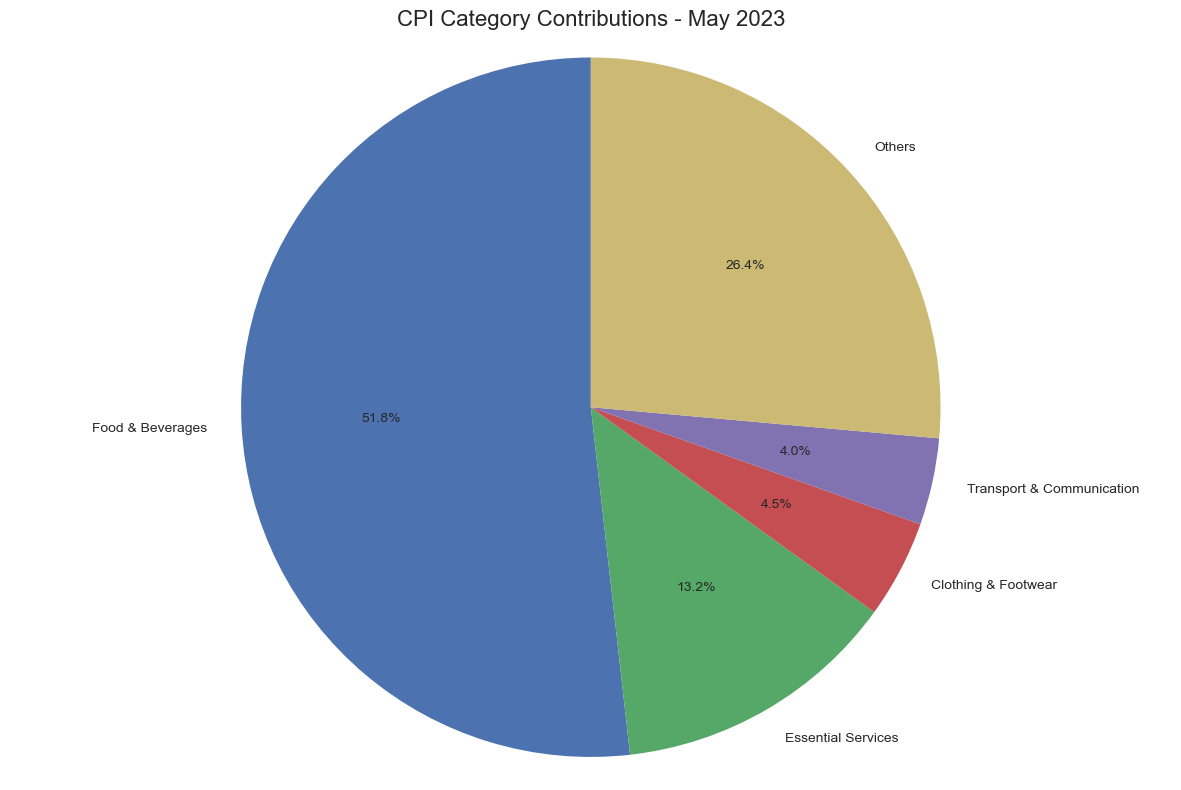

In [38]:
print("\n" + "="*60)
print("ANALYSIS 1: CONTRIBUTION OF CATEGORIES TO CPI (LATEST MONTH)")
print("="*60)

# Get the latest month data (Rural+Urban combined)
combined_data_temp = df_filled[df_filled['Sector'] == 'Rural+Urban']
if combined_data_temp.empty:
    print("No 'Rural+Urban' sector found. Available sectors:", df_filled['Sector'].unique())
    # Use the first available sector or create combined data
    available_sectors = df_filled['Sector'].unique()
    if len(available_sectors) > 0:
        latest_data = df_filled[df_filled['Sector'] == available_sectors[0]].iloc[-1]
        print(f"Using sector: {available_sectors[0]}")
    else:
        latest_data = df_filled.iloc[-1]
        print("Using last row of data")
else:
    latest_data = combined_data_temp.iloc[-1]

# Create broader category groupings with error handling and data type conversion
def categorize_contribution(latest_data):
    contributions = {}
    available_cols = latest_data.index.tolist()
    
    print(f"Available columns for analysis: {len(available_cols)}")
    
    # Helper function to safely convert to numeric
    def safe_numeric(value):
        try:
            if pd.isna(value) or value == '' or value == 'NA':
                return 0
            return float(str(value).replace(',', ''))
        except (ValueError, TypeError):
            print(f"Warning: Could not convert '{value}' to numeric, using 0")
            return 0
    
    # Food category - use actual available columns
    food_total = 0
    food_found = []
    for cat in food_categories:
        if cat in available_cols:
            val = safe_numeric(latest_data[cat])
            if val > 0:
                food_total += val
                food_found.append(cat)
    
    # If individual food categories not found, try 'Food and beverages'
    if food_total == 0 and 'Food and beverages' in available_cols:
        val = safe_numeric(latest_data['Food and beverages'])
        if val > 0:
            food_total = val
            food_found = ['Food and beverages']
    
    contributions['Food & Beverages'] = food_total
    print(f"Food categories found: {food_found}")
    
    # Essential services
    essential_total = 0
    essential_found = []
    essential_cats = ['Housing', 'Fuel and light', 'Health']
    for cat in essential_cats:
        if cat in available_cols:
            val = safe_numeric(latest_data[cat])
            if val > 0:
                essential_total += val
                essential_found.append(cat)
    contributions['Essential Services'] = essential_total
    print(f"Essential categories found: {essential_found}")
    
    # Clothing & Footwear
    clothing_total = 0
    if 'Clothing and footwear' in available_cols:
        clothing_total = safe_numeric(latest_data['Clothing and footwear'])
    else:
        for cat in ['Clothing', 'Footwear']:
            if cat in available_cols:
                val = safe_numeric(latest_data[cat])
                clothing_total += val
    contributions['Clothing & Footwear'] = clothing_total
    
    # Transportation & Communication
    transport_total = 0
    if 'Transport and communication' in available_cols:
        transport_total = safe_numeric(latest_data['Transport and communication'])
    contributions['Transport & Communication'] = transport_total
    
    # Other categories
    other_cats = ['Recreation and amusement', 'Education', 'Personal care and effects', 
                  'Pan, tobacco and intoxicants', 'Household goods and services', 'Miscellaneous']
    other_total = 0
    other_found = []
    for cat in other_cats:
        if cat in available_cols:
            val = safe_numeric(latest_data[cat])
            if val > 0:
                other_total += val
                other_found.append(cat)
    contributions['Others'] = other_total
    print(f"Other categories found: {other_found}")
    
    # Remove zero contributions
    contributions = {k: v for k, v in contributions.items() if v > 0}
    
    print(f"Final contributions: {contributions}")
    return contributions

# Calculate contributions with error handling
try:
    contributions = categorize_contribution(latest_data)
    total_contribution = sum(contributions.values())
    
    if total_contribution > 0:
        # Convert to percentages
        contribution_pct = {k: (v/total_contribution)*100 for k, v in contributions.items()}
        
        print(f"Latest Month: {latest_data['Month']} {latest_data['Year']}")
        print("\nCategory-wise Contribution to CPI:")
        for category, pct in sorted(contribution_pct.items(), key=lambda x: x[1], reverse=True):
            print(f"{category}: {pct:.2f}%")
        
        # Find highest contributor
        highest_contributor = max(contribution_pct.items(), key=lambda x: x[1])
        print(f"\nHighest Contributing Category: {highest_contributor[0]} ({highest_contributor[1]:.2f}%)")
        
        # Visualization
        if len(contribution_pct) > 0:
            plt.figure(figsize=(12, 8))
            categories = list(contribution_pct.keys())
            percentages = list(contribution_pct.values())
            
            plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=90)
            plt.title(f'CPI Category Contributions - {latest_data["Month"]} {latest_data["Year"]}', fontsize=16)
            plt.axis('equal')
            plt.tight_layout()
            plt.show()
    else:
        print("No valid numeric data found for contribution analysis")
        
except Exception as e:
    print(f"Error in contribution analysis: {e}")
    print("Sample of latest data:")
    print(latest_data.head(10))

3. ANALYSIS 2: YEAR-ON-YEAR CPI TREND (2017 onwards)


ANALYSIS 2: YEAR-ON-YEAR CPI TREND
Available years in dataset: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Analyzing data from 2017 onwards
Year-on-Year CPI Growth Rates:
2017: 3.33%
2018: 3.97%
2019: 3.97%
2020: 6.08%
2021: 5.83%
2022: 6.62%
2023: 5.58%

Highest Inflation Year: 2022 (6.62%)


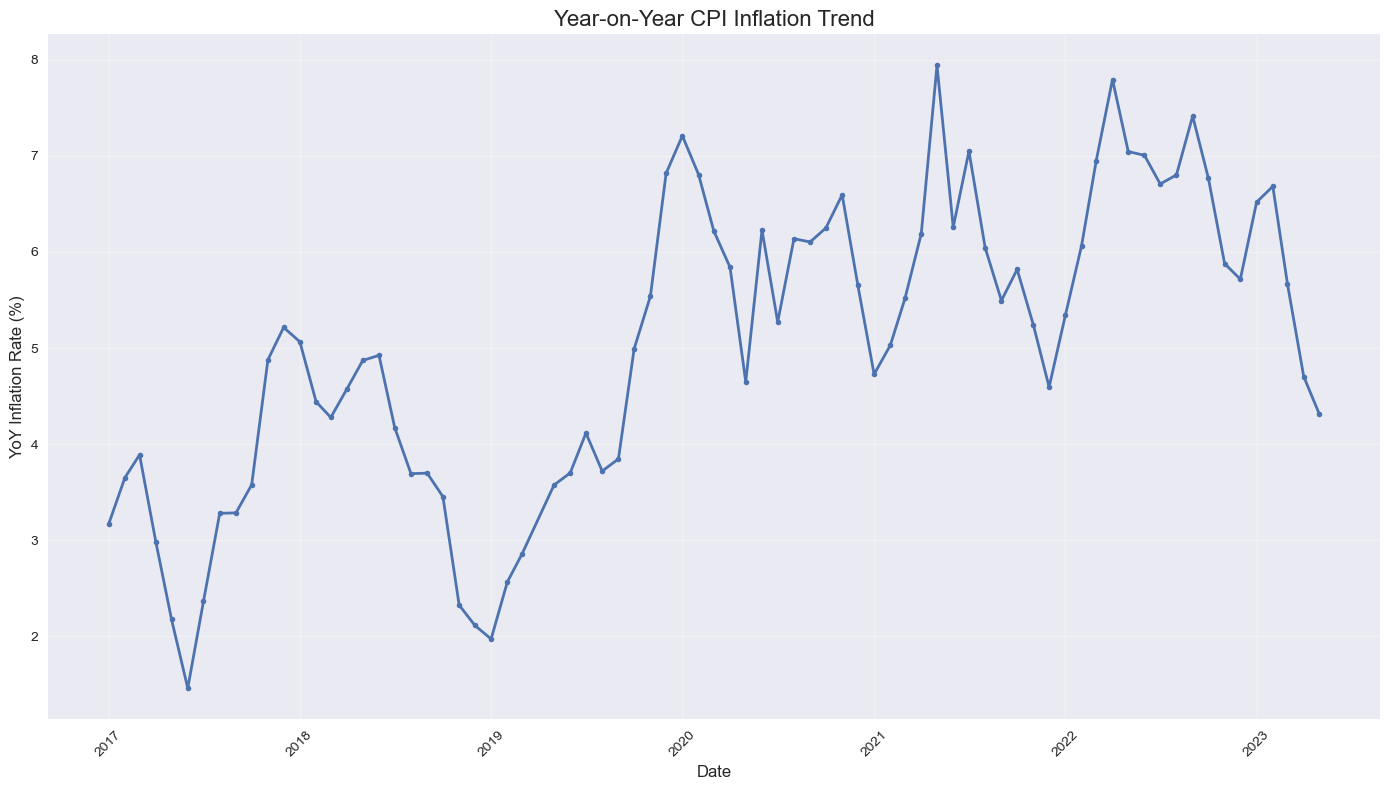

In [37]:
print("\n" + "="*60)
print("ANALYSIS 2: YEAR-ON-YEAR CPI TREND")
print("="*60)

# Filter for Rural+Urban data and sort by date with error handling
if 'Rural+Urban' in df_filled['Sector'].values:
    combined_data = df_filled[df_filled['Sector'] == 'Rural+Urban'].copy()
elif 'Combined' in df_filled['Sector'].values:
    combined_data = df_filled[df_filled['Sector'] == 'Combined'].copy()
else:
    print("No combined rural+urban data found. Using all data...")
    combined_data = df_filled.copy()

combined_data = combined_data.sort_values('Date')

# Calculate YoY growth rate with error handling
if 'General index' in combined_data.columns:
    combined_data['YoY_Growth'] = combined_data['General index'].pct_change(periods=12) * 100
else:
    print("'General index' column not found. Available columns:")
    print([col for col in combined_data.columns if 'index' in col.lower() or 'general' in col.lower()])
    # Try to find alternative general index column
    possible_general_cols = [col for col in combined_data.columns if 'general' in col.lower()]
    if possible_general_cols:
        general_col = possible_general_cols[0]
        print(f"Using '{general_col}' as general index")
        combined_data['YoY_Growth'] = combined_data[general_col].pct_change(periods=12) * 100
    else:
        print("No suitable general index column found. Skipping YoY calculation.")
        combined_data['YoY_Growth'] = np.nan

# Filter for 2017 onwards with data availability check
if 'Year' in combined_data.columns:
    # Convert Year to numeric if it's not already
    combined_data['Year_num'] = pd.to_numeric(combined_data['Year'], errors='coerce')
    available_years = sorted(combined_data['Year_num'].dropna().unique())
    print(f"Available years in dataset: {available_years}")
    
    # Use the available years, starting from 2017 or earliest available
    start_year = max(2017, min(available_years)) if available_years else 2013
    combined_2017_onwards = combined_data[combined_data['Year_num'] >= start_year].copy()
    print(f"Analyzing data from {start_year} onwards")
else:
    # If no Year column, use date-based filtering
    start_date = '2017-01-01'
    combined_2017_onwards = combined_data[combined_data['Date'] >= start_date].copy()

if not combined_2017_onwards.empty and not combined_2017_onwards['YoY_Growth'].isna().all():
    print("Year-on-Year CPI Growth Rates:")
    yearly_avg_inflation = combined_2017_onwards.groupby('Year_num')['YoY_Growth'].mean()
    for year, rate in yearly_avg_inflation.items():
        if not pd.isna(rate):
            print(f"{int(year)}: {rate:.2f}%")
    
    # Find highest inflation year
    if not yearly_avg_inflation.empty:
        highest_inflation_year = yearly_avg_inflation.idxmax()
        highest_inflation_rate = yearly_avg_inflation.max()
        if not pd.isna(highest_inflation_rate):
            print(f"\nHighest Inflation Year: {int(highest_inflation_year)} ({highest_inflation_rate:.2f}%)")
else:
    print("Insufficient data for YoY growth analysis")
    yearly_avg_inflation = pd.Series()

# Plot YoY trend with data availability check
if not combined_2017_onwards.empty and not combined_2017_onwards['YoY_Growth'].isna().all():
    plt.figure(figsize=(14, 8))
    valid_data = combined_2017_onwards.dropna(subset=['YoY_Growth'])
    plt.plot(valid_data['Date'], valid_data['YoY_Growth'], 
             linewidth=2, marker='o', markersize=4)
    plt.title('Year-on-Year CPI Inflation Trend', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('YoY Inflation Rate (%)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data for YoY trend visualization")

4. ANALYSIS 3: FOOD INFLATION ANALYSIS (Sample Period)


ANALYSIS 3: FOOD INFLATION ANALYSIS
Recent Month-on-Month Food Inflation:
June 2022: 0.92%
July 2022: 0.06%
August 2022: 0.74%
September 2022: 0.85%
October 2022: 1.01%
November 2022: -0.72%
December 2022: -1.35%
January 2023: 0.45%
February 2023: 0.17%
March 2023: 0.00%
April 2023: 0.51%
May 2023: 0.67%

Highest Food Inflation: July 2014 (3.57%)
Lowest Food Inflation: December 2013 (-3.43%)

Analyzing 12 food subcategories...


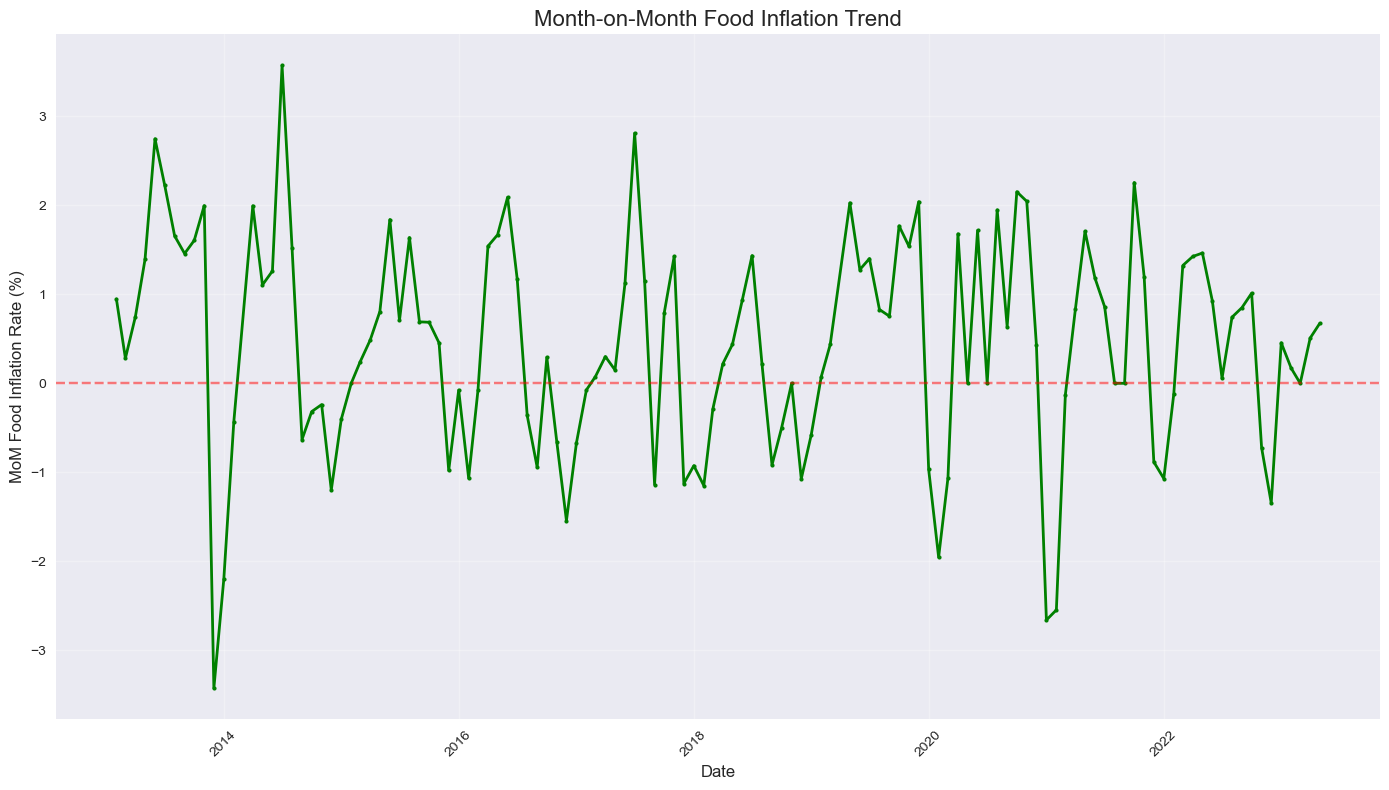

In [39]:
print("\n" + "="*60)
print("ANALYSIS 3: FOOD INFLATION ANALYSIS")
print("="*60)

# Calculate month-on-month food inflation with error handling
food_column = None
if 'Food and beverages' in combined_data.columns:
    food_column = 'Food and beverages'
elif 'Food' in combined_data.columns:
    food_column = 'Food'
else:
    # Look for any column containing 'food'
    food_cols = [col for col in combined_data.columns if 'food' in col.lower()]
    if food_cols:
        food_column = food_cols[0]
        print(f"Using '{food_column}' for food inflation analysis")

if food_column:
    combined_data['Food_MoM'] = combined_data[food_column].pct_change() * 100
    
    # Display recent food inflation trends
    print("Recent Month-on-Month Food Inflation:")
    recent_food_data = combined_data[['Date', 'Month', 'Year', 'Food_MoM']].tail(12)
    for _, row in recent_food_data.iterrows():
        if not pd.isna(row['Food_MoM']):
            print(f"{row['Month']} {row['Year']}: {row['Food_MoM']:.2f}%")
    
    # Find highest and lowest food inflation months
    if not combined_data['Food_MoM'].isna().all():
        max_idx = combined_data['Food_MoM'].idxmax()
        min_idx = combined_data['Food_MoM'].idxmin()
        
        if pd.notna(max_idx) and pd.notna(min_idx):
            max_food_inflation = combined_data.loc[max_idx]
            min_food_inflation = combined_data.loc[min_idx]
            
            print(f"\nHighest Food Inflation: {max_food_inflation['Month']} {max_food_inflation['Year']} ({max_food_inflation['Food_MoM']:.2f}%)")
            print(f"Lowest Food Inflation: {min_food_inflation['Month']} {min_food_inflation['Year']} ({min_food_inflation['Food_MoM']:.2f}%)")
else:
    print("No food-related column found for analysis")
    combined_data['Food_MoM'] = np.nan

# Analyze individual food category contributions
food_subcategories = [cat for cat in food_categories if cat in combined_data.columns]
print(f"\nAnalyzing {len(food_subcategories)} food subcategories...")

# Plot food inflation trend
plt.figure(figsize=(14, 8))
plt.plot(combined_data['Date'], combined_data['Food_MoM'], 
         linewidth=2, color='green', marker='o', markersize=3)
plt.title('Month-on-Month Food Inflation Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('MoM Food Inflation Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. ANALYSIS 4: COVID-19 IMPACT ON INFLATION


ANALYSIS 4: COVID-19 IMPACT ON INFLATION
Pre-COVID Average Inflation (before March 2020): 4.79%
Post-COVID Average Inflation (March 2020 onwards): 6.06%
Change in Inflation: 1.27 percentage points

Category-wise COVID Impact:
Health: 33.81% change in index levels
Food and beverages: 26.49% change in index levels
Fuel and light: 29.80% change in index levels


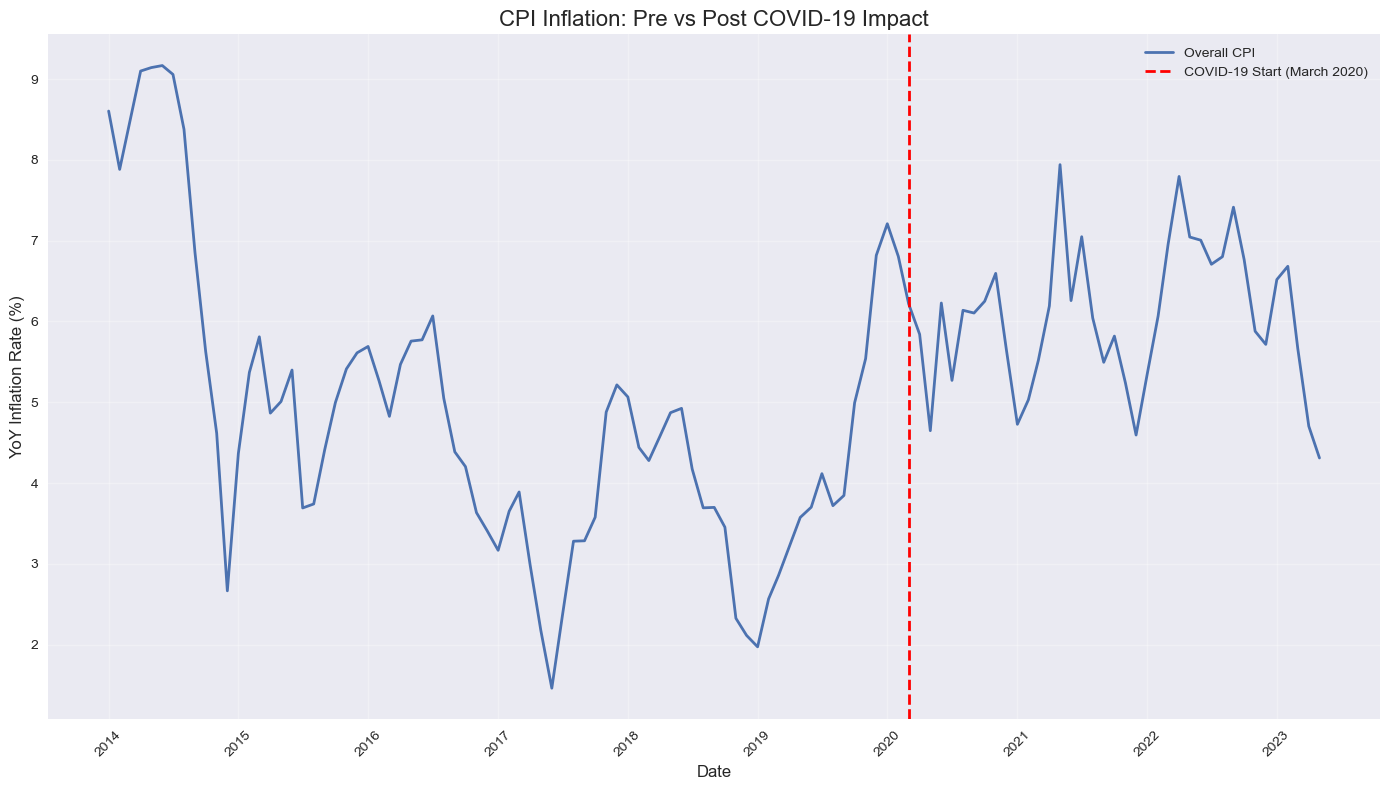

In [44]:
print("\n" + "="*60)
print("ANALYSIS 4: COVID-19 IMPACT ON INFLATION")
print("="*60)

# Define pre and post COVID periods
covid_start = pd.to_datetime('2020-03-01')

# Split data into pre and post COVID
pre_covid = combined_data[combined_data['Date'] < covid_start]
post_covid = combined_data[combined_data['Date'] >= covid_start]

if not pre_covid.empty and not post_covid.empty:
    # Calculate average inflation rates
    pre_covid_avg = pre_covid['YoY_Growth'].mean()
    post_covid_avg = post_covid['YoY_Growth'].mean()
    
    print(f"Pre-COVID Average Inflation (before March 2020): {pre_covid_avg:.2f}%")
    print(f"Post-COVID Average Inflation (March 2020 onwards): {post_covid_avg:.2f}%")
    print(f"Change in Inflation: {post_covid_avg - pre_covid_avg:.2f} percentage points")
    
    # Analyze specific categories
    healthcare_categories = ['Health']
    essential_categories = ['Food and beverages', 'Fuel and light']
    
    print("\nCategory-wise COVID Impact:")
    for category in healthcare_categories + essential_categories:
        if category in combined_data.columns:
            pre_avg = pre_covid[category].mean()
            post_avg = post_covid[category].mean()
            change = ((post_avg - pre_avg) / pre_avg) * 100
            print(f"{category}: {change:.2f}% change in index levels")

# Visualize COVID impact
plt.figure(figsize=(14, 8))
plt.plot(combined_data['Date'], combined_data['YoY_Growth'], linewidth=2, label='Overall CPI')
plt.axvline(x=covid_start, color='red', linestyle='--', linewidth=2, label='COVID-19 Start (March 2020)')
plt.title('CPI Inflation: Pre vs Post COVID-19 Impact', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('YoY Inflation Rate (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. ANALYSIS 5: CORRELATION ANALYSIS (SAMPLE)


ANALYSIS 5: CORRELATION ANALYSIS BETWEEN CATEGORIES


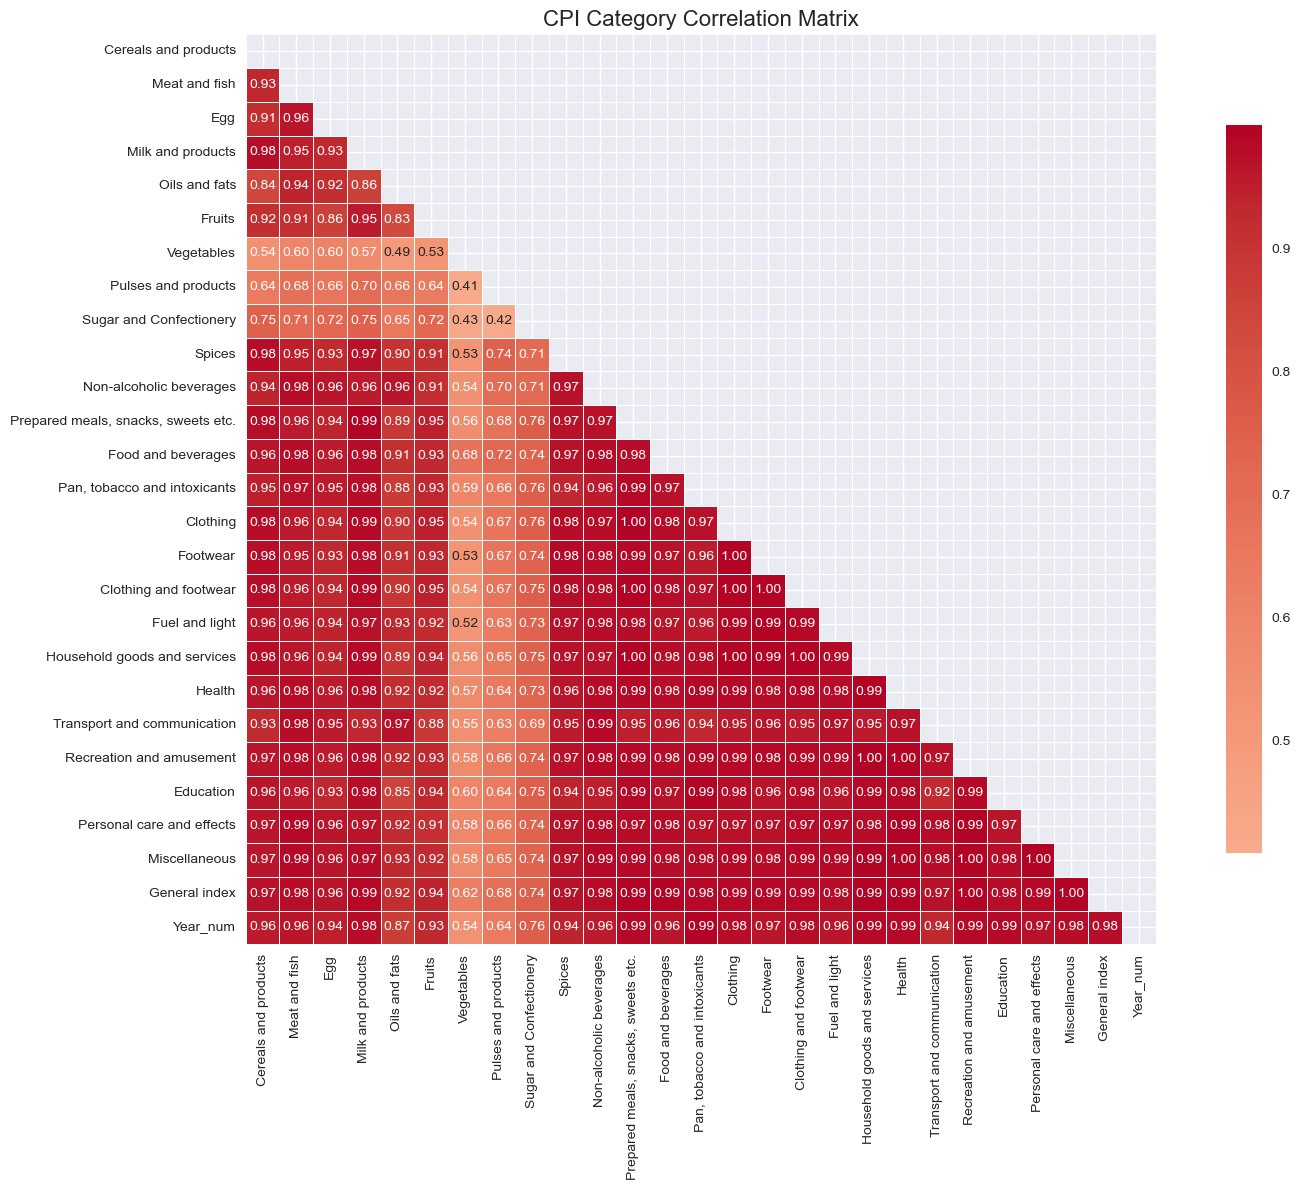

Categories most correlated with General CPI Index:
Recreation and amusement: 0.996
Miscellaneous: 0.996
Food and beverages: 0.995
Health: 0.994
Household goods and services: 0.993
Prepared meals, snacks, sweets etc.: 0.992
Clothing: 0.990
Clothing and footwear: 0.990
Personal care and effects: 0.990
Footwear: 0.986
Milk and products: 0.985
Pan, tobacco and intoxicants: 0.984
Education: 0.984
Non-alcoholic beverages: 0.984
Fuel and light: 0.983
Meat and fish: 0.982
Year_num: 0.981
Spices: 0.974
Cereals and products: 0.971
Transport and communication: 0.970
Egg: 0.961
Fruits: 0.938
Oils and fats: 0.917
Sugar and Confectionery: 0.745
Pulses and products: 0.682
Vegetables: 0.621


In [45]:
import seaborn as sns

print("\n" + "="*60)
print("ANALYSIS 5: CORRELATION ANALYSIS BETWEEN CATEGORIES")
print("="*60)

# Select numeric columns for correlation analysis
numeric_columns = combined_data.select_dtypes(include=[np.number]).columns
correlation_categories = [col for col in numeric_columns if col not in ['Year', 'YoY_Growth', 'Food_MoM']]

if len(correlation_categories) > 1:
    # Calculate correlation matrix
    correlation_matrix = combined_data[correlation_categories].corr()
    
    # Plot heatmap
    plt.figure(figsize=(16, 12))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')
    plt.title('CPI Category Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Find most correlated categories with General index
    if 'General index' in correlation_matrix.columns:
        general_corr = correlation_matrix['General index'].sort_values(ascending=False)
        print("Categories most correlated with General CPI Index:")
        for category, corr in general_corr.items():
            if category != 'General index':
                print(f"{category}: {corr:.3f}")

7. SUMMARY STATISTICS AND KEY INSIGHTS

In [49]:
print("\n" + "="*60)
print("SUMMARY STATISTICS AND KEY INSIGHTS")
print("="*60)

# Overall statistics
print("\nDATASET OVERVIEW:\n")
print(f"Time Period: {combined_data['Date'].min().strftime('%B %Y')} to {combined_data['Date'].max().strftime('%B %Y')}")
print(f"Total Months Analyzed: {len(combined_data)}")
print(f"Average Annual Inflation: {combined_data['YoY_Growth'].mean():.2f}%")
print(f"Inflation Volatility (Std Dev): {combined_data['YoY_Growth'].std():.2f}%")
print(f"Highest Monthly Inflation: {combined_data['YoY_Growth'].max():.2f}%")
print(f"Lowest Monthly Inflation: {combined_data['YoY_Growth'].min():.2f}%")

# Category-wise volatility analysis
print("\nCATEGORY VOLATILITY ANALYSIS:\n")
volatility_analysis = {}
for col in correlation_categories:
    if combined_data[col].std() > 0:
        volatility_analysis[col] = combined_data[col].std()

most_volatile = sorted(volatility_analysis.items(), key=lambda x: x[1], reverse=True)[:5]
print("Most Volatile Categories (Top 5):")
for category, volatility in most_volatile:
    print(f"{category}: {volatility:.2f} (Std)")

# Additional utility function for custom analysis
def analyze_specific_period(start_date, end_date, category='General index'):

    mask = (combined_data['Date'] >= start_date) & (combined_data['Date'] <= end_date)
    period_data = combined_data.loc[mask]
    
    if not period_data.empty and category in period_data.columns:
        avg_inflation = period_data['YoY_Growth'].mean()
        avg_index = period_data[category].mean()
        
        print(f"\nCustom Period Analysis ({start_date} to {end_date}):")
        print(f"Average Inflation: {avg_inflation:.2f}%")
        print(f"Average {category} Index: {avg_index:.2f}")
        
        return period_data
    else:
        print("No data available for the specified period or category.")
        return None


SUMMARY STATISTICS AND KEY INSIGHTS

DATASET OVERVIEW:

Time Period: January 2013 to May 2023
Total Months Analyzed: 123
Average Annual Inflation: 5.23%
Inflation Volatility (Std Dev): 1.65%
Highest Monthly Inflation: 9.17%
Lowest Monthly Inflation: 1.46%

CATEGORY VOLATILITY ANALYSIS:

Most Volatile Categories (Top 5):
Meat and fish: 32.95 (Std)
Oils and fats: 30.05 (Std)
Pan, tobacco and intoxicants: 29.20 (Std)
Spices: 27.16 (Std)
Vegetables: 25.21 (Std)
